# Les références qui nous lient : Atelier pour constituer des réseaux de connaissances à partir d'une bibliothèque Zotero 

----------

Atelier du *Comparative Materialities: Media, Literature, Theory Research Group*| *Groupe de recherche matérialités comparatives : Médias, littérature et théorie*

Date : 22 Février - 9h30 (HNE) 
Lien : https://meet.jit.si/CCLA2022-AtelierCRCEN 

Bibliographie Zotero : https://www.zotero.org/groups/4592469/ccla-atelier/library

--------------


Documentation : 
- [pyzotero Library](https://pyzotero.readthedocs.io/en/latest/)
- [Zotero JavaScript API](https://www.zotero.org/support/dev/client_coding/javascript_api)
- [graphviz Library](https://graphviz.org/Gallery/)
- [Counter Library](https://stackabuse.com/introduction-to-pythons-collections-module/#thecounter)


## Graph ta recherche 

Le but du code python est de pouvoir visualiser à partir des informations de notre bibliothèque zotero des réseaux de connaissances : 

    - entre les références entre elles 
    - entre les références et les chercheur.e.s 
    - entre les chercheur.e.s 
    
   

### Importer les données avec PyZotero

Le premier besoin est d'aller *fetcher* les informations contenues dans notre bibliographie. 

Pour ce faire, plusieurs composants permettent de le faire, dont la solution [pyzotero](https://pyzotero.readthedocs.io/en/latest/#) qui est un *wrapper* de l'API Zotero(v3)

In [1]:
# J'importe tout d'abord la library pyzotero dans mon espace de code python : 
from pyzotero import zotero 

# Je donne ensuite les informations de la collection que je souhaite wrapper 
# (collection personnelle ou de groupe)
# sous la forme zot = zotero.Zotero(library_id, library_type, api_key)

bibliographie = zotero.Zotero(4592469, 'group', 'Ewb5yovHaWOXqDG2M9rAf2FP')

# Dans cette bibliographie, je définis les items et donne le paramètre "limit=5", 
# pour lui dire d'aller me chercher les 5 premières références
# en mettant "limit=None", j'affiche toutes les références 
items = bibliographie.top(limit=5)

print(items)
# si je veux seulement le premier item de ma bibliographie : print(item[0])

[{'key': '6PJ6UTZC', 'version': 7, 'library': {'type': 'group', 'id': 4592469, 'name': 'CCLA-atelier', 'links': {'alternate': {'href': 'https://www.zotero.org/groups/ccla-atelier', 'type': 'text/html'}}}, 'links': {'self': {'href': 'https://api.zotero.org/groups/4592469/items/6PJ6UTZC', 'type': 'application/json'}, 'alternate': {'href': 'https://www.zotero.org/groups/ccla-atelier/items/6PJ6UTZC', 'type': 'text/html'}}, 'meta': {'createdByUser': {'id': 4362402, 'username': 'margotmellet', 'name': '', 'links': {'alternate': {'href': 'https://www.zotero.org/margotmellet', 'type': 'text/html'}}}, 'creatorSummary': 'Vitali-Rosati and Larrue', 'parsedDate': '2019', 'numChildren': 1}, 'data': {'key': '6PJ6UTZC', 'version': 7, 'itemType': 'book', 'title': 'Media do not exist', 'creators': [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati'}, {'creatorType': 'author', 'firstName': 'Jean-Marc', 'lastName': 'Larrue'}], 'abstractNote': 'Media Do Not Exist: Performativit

Je vais maintenant aller *jouer* avec les informations de ma bibliographie pour sélectionner l'affichage mais également le type de données à afficher. 

In [2]:
# Je peux ajouter des paramètres à mes items comme le format de sortie (hmtl)
items = bibliographie.top(limit=None, content="html", style="mla", linkwrap=1)

print(items[2])
    

<table>
          <tr class="itemType">
            <th style="text-align: right;">Type</th>
            <td>Book</td>
          </tr>
          <tr class="creator">
            <th style="text-align: right;">Author</th>
            <td>Servanne Monjour</td>
          </tr>
          <tr class="url">
            <th style="text-align: right;">URL</th>
            <td>https://papyrus.bib.umontreal.ca/xmlui/handle/1866/13614</td>
          </tr>
          <tr class="place">
            <th style="text-align: right;">Place</th>
            <td>Montréal</td>
          </tr>
          <tr class="publisher">
            <th style="text-align: right;">Publisher</th>
            <td>Université de Montréal et Université Rennes 2</td>
          </tr>
          <tr class="date">
            <th style="text-align: right;">Date</th>
            <td>2016</td>
          </tr>
          <tr class="extra">
            <th style="text-align: right;">Extra</th>
            <td>Thèse de doctorat réalisée 

In [3]:
# Je peux également choisir quelles informations sont importantes pour moi à l'affichage 
items = bibliographie.top(limit=None)

# Pour chaque item 
for item in items:
    # je souhaite le type d'item et le titre édité ainsi :
    # le \n permet de sauter une ligne
    print('Item Type: %s | Titre: %s \n' % (item['data']['itemType'], item['data']['title']))

Item Type: book | Titre: Media do not exist 

Item Type: journalArticle | Titre: Design de la conversation scientifique : naissance d’un format éditorial 

Item Type: book | Titre: La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique 

Item Type: book | Titre: Égarements. Amour, mort et identités numériques 

Item Type: bookSection | Titre: Lire, écrire et partager en numérique 



### *Jouer* avec les tags

On va maintenant s'intéresser aux tags ajoutés aux références. 
On peut déjà lister les tags qui sont présents dans la bibliographie. 

In [4]:
# Pour cela, je peux utiliser une fonctionnalité de pyzotero qui va récupérer tous les tags
zotero.Zotero.tags(bibliographie)

# Je lui demande d'imprimer la liste des tags
print(zotero.Zotero.tags(bibliographie))

# Je peux aussi lui demander de les compter pour moi et d'afficher le nombre de tags 
print(f"\n Il y a {len(zotero.Zotero.tags(bibliographie))} tags dans ma bibliographie")

['Revue', 'Conversation', 'Partage', 'Edition', 'Production des contenus', 'Circulation des contenus', 'Conjonctures médiatrices', 'Légitimation des contenus', 'Détournement', 'Intermédialité', 'Littérature', 'Médias', 'Performativité', 'Pratiques intermédiales', 'Privé / public', 'Profils et identités numériques', 'virtuel', 'Imaginaire-réel', 'Philosophie']

 Il y a 19 tags dans ma bibliographie


In [5]:
# Je peux également extraire les tags pour en faire une liste 
items= bibliographie.top(limit=None)

# Pour cela, je créé une liste vide pour y placer tous les occurences de tags de la bibliographie
liste_tags = []

# Pour chaque item dans ma bibliographie
for item in items: 
    # je lui demande d'ajouter la valeur du tag contenu dans tags, data d'items
    liste_tags.extend([t.get("tag") for t in item["data"]["tags"]])

# J'importe ensuite la library Counter qui compte les occurences
from collections import Counter
# Je place ma liste dans cette fonction de compte
Counter(liste_tags)

# Mais je souhaite aussi que la liste me sorte dans l'ordre croissant 
# alors je créé une valeur qui englobe le décompte de mes tags
frequence_tags = Counter(liste_tags)
# et choisis l'option "most_common"
frequence_tags.most_common()

# Je aussi en plaçant un chiffre à l'intérieur des parenthèses sélectionner les plus communs 
# frequence_tags.most_common(3) me donnera les 3 plus communs
# frequence_tags.most_common()[-2:] à l'inverse me donnera les 2 deux derniers les moins communs

[('Edition', 3),
 ('Intermédialité', 2),
 ('Médias', 2),
 ('Performativité', 2),
 ('Pratiques intermédiales', 2),
 ('Imaginaire-réel', 2),
 ('Circulation des contenus', 1),
 ('Conjonctures médiatrices', 1),
 ('Légitimation des contenus', 1),
 ('Production des contenus', 1),
 ('Conversation', 1),
 ('Revue', 1),
 ('Détournement', 1),
 ('Littérature', 1),
 ('Philosophie', 1),
 ('Privé / public', 1),
 ('Profils et identités numériques', 1),
 ('virtuel', 1),
 ('Partage', 1)]

In [6]:
# Je peux afficher mes références selon les tags qui leurs sont assignés. 
# Je définis ma valeur tags
tags = zotero.Zotero.tags(bibliographie)

items = bibliographie.top(limit=None)

# Dans tags, pour chaque tag : 
for tag in tags: 
    # pour chaque item
    for item in items:
        # je créé une liste des tags dans items pour l'interroger plus facilement 
        # je lui dis : va me chercher la valeur qui correspond à "tag" dans "data", "tags" d'item
        # ces valeurs vont être listées dans liste_tags
        liste_tags = [t.get("tag") for t in item["data"]["tags"]]
        # si un tag est présent dans la liste des tags
        if tag in liste_tags:
            # alors affiche moi le tag en question et la référence qui y est associée
            print(f"{tag} in : {item['data']['title']}")

Revue in : Design de la conversation scientifique : naissance d’un format éditorial
Conversation in : Design de la conversation scientifique : naissance d’un format éditorial
Partage in : Lire, écrire et partager en numérique
Edition in : Design de la conversation scientifique : naissance d’un format éditorial
Edition in : La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique
Edition in : Lire, écrire et partager en numérique
Production des contenus in : Media do not exist
Circulation des contenus in : Media do not exist
Conjonctures médiatrices in : Media do not exist
Légitimation des contenus in : Media do not exist
Détournement in : La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique
Intermédialité in : Media do not exist
Intermédialité in : La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique
Littérature in : La littérature à l’ère photographi

### Créer des dictionnaires

Maintenant je veux pouvoir visualiser les liens qui existent entre les références par les tags. Pour cela il faut que mes informations soient structurées en dictionnaires qui est un type de collection que je peux interroger. 

In [8]:
# Je vais alors ici utiliser une library vraiment utile : elle me permet de
# définir de quel type vont être par défaut les éléments qui vont composer mon dictionnaire
# exemple : si je lui dit "defaultdict(int)" je lui indique que je veux une liste d'integer
# cela permet d'éviter des lignes de "if" et de complications
from collections import defaultdict

# Je vais faire un premier dictionnaire qui contient mes références : 
dict_ref = defaultdict(list)

# Je vais aller chercher les informations référence par référence
for item in items:
    #print(item["data"]) pour vérifier comment sont structurées mes informations à la base
    
    # je lui informe l'emplacement des données qui m'intéressent
    data = item["data"]
    title = data["title"]    

    # Avec les doubles parenthèses (on peut mettre aussi des crochets)
    # on peut ainsi mettre plus d'un argument à l'append
    # et ici je veux que mon dictionnaire se compose du titre, de l'auteur, de la date, etc.
    dict_ref[title].append((item["data"]["title"], item["data"]["creators"], item["data"]["date"], item["data"]["tags"]))

print(dict_ref)

defaultdict(<class 'list'>, {'Media do not exist': [('Media do not exist', [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati'}, {'creatorType': 'author', 'firstName': 'Jean-Marc', 'lastName': 'Larrue'}], '2019', [{'tag': 'Circulation des contenus'}, {'tag': 'Conjonctures médiatrices'}, {'tag': 'Intermédialité'}, {'tag': 'Légitimation des contenus'}, {'tag': 'Médias'}, {'tag': 'Performativité'}, {'tag': 'Pratiques intermédiales'}, {'tag': 'Production des contenus'}])], 'Design de la conversation scientifique : naissance d’un format éditorial': [('Design de la conversation scientifique : naissance d’un format éditorial', [{'creatorType': 'author', 'firstName': 'Nicolas', 'lastName': 'Sauret'}], '2018-12-14', [{'tag': 'Conversation'}, {'tag': 'Edition'}, {'tag': 'Revue'}])], 'La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique': [('La littérature à l’ère photographique : mutations, novations, enjeux : de l’argent

In [9]:
# Je vais faire un autre dictionnaire qui contient mes tags : 
dict_tags = defaultdict(list)

# Je vais aller chercher les informations référence par référence
for item in items:
    
    # Je lui donne l'emplacement 
    data = item["data"]
    
    # Or comme les tags sont déjà ordonnés comme un dictionnaire, il faut que j'utilise la key 
    for tag in data["tags"]: 
        key = tag["tag"] 
        dict_tags[key].append((item["data"]["title"], item["data"]["creators"], item["data"]["date"]))

# Je peux préciser ma requête pour savoir quelles références ont le tag "Edition"
print(dict_tags)

defaultdict(<class 'list'>, {'Circulation des contenus': [('Media do not exist', [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati'}, {'creatorType': 'author', 'firstName': 'Jean-Marc', 'lastName': 'Larrue'}], '2019')], 'Conjonctures médiatrices': [('Media do not exist', [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati'}, {'creatorType': 'author', 'firstName': 'Jean-Marc', 'lastName': 'Larrue'}], '2019')], 'Intermédialité': [('Media do not exist', [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati'}, {'creatorType': 'author', 'firstName': 'Jean-Marc', 'lastName': 'Larrue'}], '2019'), ('La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique', [{'creatorType': 'author', 'firstName': 'Servanne', 'lastName': 'Monjour'}], '2016')], 'Légitimation des contenus': [('Media do not exist', [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati

In [10]:
# Je peux savoir combien de fois les tags apparaissent 
for key, value in dict_tags.items():
    #value = item["data"]["title"]
    print(f"{key} apparaît {len(value)} fois ")
    #print(f"{len(value)} {key} \n {value}")

Circulation des contenus apparaît 1 fois 
Conjonctures médiatrices apparaît 1 fois 
Intermédialité apparaît 2 fois 
Légitimation des contenus apparaît 1 fois 
Médias apparaît 2 fois 
Performativité apparaît 2 fois 
Pratiques intermédiales apparaît 2 fois 
Production des contenus apparaît 1 fois 
Conversation apparaît 1 fois 
Edition apparaît 3 fois 
Revue apparaît 1 fois 
Détournement apparaît 1 fois 
Imaginaire-réel apparaît 2 fois 
Littérature apparaît 1 fois 
Philosophie apparaît 1 fois 
Privé / public apparaît 1 fois 
Profils et identités numériques apparaît 1 fois 
virtuel apparaît 1 fois 
Partage apparaît 1 fois 


In [11]:
# Je peux avoir la liste des références et leurs tags
for key, value in dict_ref.items():
    #value = value["data"]["tags"]
    #print(f"{key} est associé à {len(value)} tags {value}")
    # print(f"{len(value)} {key} \n {value}")
    print(value[0])

('Media do not exist', [{'creatorType': 'author', 'firstName': 'Marcello', 'lastName': 'Vitali-Rosati'}, {'creatorType': 'author', 'firstName': 'Jean-Marc', 'lastName': 'Larrue'}], '2019', [{'tag': 'Circulation des contenus'}, {'tag': 'Conjonctures médiatrices'}, {'tag': 'Intermédialité'}, {'tag': 'Légitimation des contenus'}, {'tag': 'Médias'}, {'tag': 'Performativité'}, {'tag': 'Pratiques intermédiales'}, {'tag': 'Production des contenus'}])
('Design de la conversation scientifique : naissance d’un format éditorial', [{'creatorType': 'author', 'firstName': 'Nicolas', 'lastName': 'Sauret'}], '2018-12-14', [{'tag': 'Conversation'}, {'tag': 'Edition'}, {'tag': 'Revue'}])
('La littérature à l’ère photographique : mutations, novations, enjeux : de l’argentique au numérique', [{'creatorType': 'author', 'firstName': 'Servanne', 'lastName': 'Monjour'}], '2016', [{'tag': 'Détournement'}, {'tag': 'Edition'}, {'tag': 'Imaginaire-réel'}, {'tag': 'Intermédialité'}, {'tag': 'Littérature'}, {'tag':

### Créer une liste d'objets 



In [12]:
# Les objets c'est mieux parce qu'on peut définir les entrées dans nos données
class Reference:
# on met une majuscule aux objets
    def __init__(self, entry):
        self.entry = entry 
        # la méthode de récupération brutale : 
        # self.title = entry["data"]["title"]
        # self.author = entry["data"]["creators"]
        # self.date = entry["data"]["date"]
        # self.type = entry["data"]["itemType"]
        # self.tags = [t.get("tag") for t in entry["data"]["tags"]]
        # ou la méthode de récupération douce :
        self.title = entry.get("data", {}).get("title", "No title").replace(":", "-")
        #self.author = entry.get("data", {}).get("creators", "No author")
        self.author = [f"{t.get('firstName', 'No firstName')} {t.get('lastName', 'No lastName')}" for t in entry.get("data", {}).get("creators", [])]
        self.date = entry.get("data", {}).get("date", "No date")
        self.type = entry.get("data", {}).get("itemType", "No type")
        self.tags = [t.get("tag") for t in entry.get("data", {}).get("tags", [])]
        

In [13]:
for entry in bibliographie.top(limit=None):
    reference = Reference(entry)
    print(f"{reference.title} a {len(reference.tags)} tags : {', '.join(reference.tags)}")
    print(
        "Les auteur.e.s sont :" if len(reference.author) > 1 else "L'auteur.e est :"
        , ', '.join(reference.author))
    

Media do not exist a 8 tags : Circulation des contenus, Conjonctures médiatrices, Intermédialité, Légitimation des contenus, Médias, Performativité, Pratiques intermédiales, Production des contenus
Les auteur.e.s sont : Marcello Vitali-Rosati, Jean-Marc Larrue
Design de la conversation scientifique - naissance d’un format éditorial a 3 tags : Conversation, Edition, Revue
L'auteur.e est : Nicolas Sauret
La littérature à l’ère photographique - mutations, novations, enjeux - de l’argentique au numérique a 8 tags : Détournement, Edition, Imaginaire-réel, Intermédialité, Littérature, Médias, Performativité, Pratiques intermédiales
L'auteur.e est : Servanne Monjour
Égarements. Amour, mort et identités numériques a 5 tags : Imaginaire-réel, Philosophie, Privé / public, Profils et identités numériques, virtuel
L'auteur.e est : Marcello Vitali-Rosati
Lire, écrire et partager en numérique a 2 tags : Edition, Partage
Les auteur.e.s sont : Catherine Lenoble, Antoine Fauchié


In [14]:
# on va faire une liste d'objet pour les refs 
liste_reference = []

for entry in bibliographie.top(limit=None):
    reference = Reference(entry)
    liste_reference.append(reference)
print(liste_reference)

[<__main__.Reference object at 0x7fe278163e20>, <__main__.Reference object at 0x7fe278163610>, <__main__.Reference object at 0x7fe278163070>, <__main__.Reference object at 0x7fe278163820>, <__main__.Reference object at 0x7fe278163460>]


### Créer des visualisations des liens 

Le but est maintenant de parvenir à des visualisations/affichages de ces données. 
Pour cela je vais utiliser une library qui permet de faire des graphiques en python. 

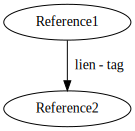

In [15]:
# J'importe la library en question 
import graphviz 

# Exemple d'un graphique, je lui donne notamment le nom d'export
exemple = graphviz.Digraph('G', filename='Test.gv')
# Il est possible d'appeler d'autres types de graphique à partir de la librairie graphviz.

# Je définis une première relation : 
# pour la suite, il n'est bien sûr pas question de faire les relations à la main une à une 
# mais de définir un code python qui le fasse automatiquement 
exemple.edge('Reference1', 'Reference2', label='lien - tag')

exemple
# "exemple.view" permet de télécharger le fichier.

Sur ce modèle, je vais maintenant représenter les liens entre les références par les tags de manière automatique : grâce à mes dictionnaires. 

In [16]:
# Je peux créer mes modules à partir de ma liste objets de références
# Je créé d'abord mon graphique
network = graphviz.Digraph(filename="CCLA-Network.gv")
                           
                           #node_attr={'color': 'lightblue2', 'style': 'filled', 'shape':'star'})
#network.attr(size='6,6')

# Pour chaque référence dans ma bibliographie 
#for reference in liste_reference:
    # créé moi un module 
    #network.node(reference.title)


# Affiche moi le résultat
network

In [17]:
# Maintenant je dois lui dire de créer les relations entres les modules selon les tags 

already_existing_links = set()

for reference1 in liste_reference: 
    for reference2 in liste_reference: 
        for tag1 in reference1.tags:
            if reference1.title != reference2.title and tag1 in reference2.tags:
                edge = tuple(sorted((reference1.title, reference2.title, tag1))) 
                if edge not in already_existing_links:
                    network.edge(reference1.title, reference2.title, label = tag1, arrowhead=None)
                    already_existing_links.add(edge)
                    print(edge)
        
network
network.view()

('Intermédialité', 'La littérature à l’ère photographique - mutations, novations, enjeux - de l’argentique au numérique', 'Media do not exist')
('La littérature à l’ère photographique - mutations, novations, enjeux - de l’argentique au numérique', 'Media do not exist', 'Médias')
('La littérature à l’ère photographique - mutations, novations, enjeux - de l’argentique au numérique', 'Media do not exist', 'Performativité')
('La littérature à l’ère photographique - mutations, novations, enjeux - de l’argentique au numérique', 'Media do not exist', 'Pratiques intermédiales')
('Design de la conversation scientifique - naissance d’un format éditorial', 'Edition', 'La littérature à l’ère photographique - mutations, novations, enjeux - de l’argentique au numérique')
('Design de la conversation scientifique - naissance d’un format éditorial', 'Edition', 'Lire, écrire et partager en numérique')
('Imaginaire-réel', 'La littérature à l’ère photographique - mutations, novations, enjeux - de l’argent

'CCLA-Network.gv.pdf'

In [18]:
# Maintenant un graph pour visualiser les liens entre auteurs selon les références 

# Mais je dois lui dire de créer les relations entres les modules selon les tags 


already_existing_links = set()

for reference1 in liste_reference: 
    for reference2 in liste_reference: 
        for tag1 in reference1.tags:
            if reference1.author != reference2.author and tag1 in reference2.tags:
                edge = tuple(sorted((reference1.author, reference2.author, tag1))) 
                if edge not in already_existing_links:
                    network.edge(reference1.author, reference2.author, label = tag1, arrowhead=None)
                    already_existing_links.add(edge)
                    print(edge)
        
network
network.view()

TypeError: '<' not supported between instances of 'str' and 'list'